        用户编号   满意度    评分  总项目数  每月平均工作小时数（小时）  工龄（年）  工作事故  离职  5年内升职   部门 薪资
0          1  0.38  0.53     2            157      3     0   1      0  销售部  低
1          2  0.80  0.86     5            242      6     0   1      0  销售部  中
2          3  0.11  0.88     7            242      4     0   1      0  销售部  中
3          4  0.72  0.87     5            223      5     0   1      0  销售部  低
4          5  0.37  0.52     2            159      3     0   1      0  销售部  低
...      ...   ...   ...   ...            ...    ...   ...  ..    ...  ... ..
14994  14995  0.40  0.57     2            151      3     0   1      0  支持部  低
14995  14996  0.37  0.48     2            160      3     0   1      0  支持部  低
14996  14997  0.37  0.53     2            143      3     0   1      0  支持部  低
14997  14998  0.11  0.96     6            240      4     0   1      0  支持部  低
14998  14999  0.37  0.52     2            158      3     0   1      0  支持部  低

[14999 rows x 11 columns]


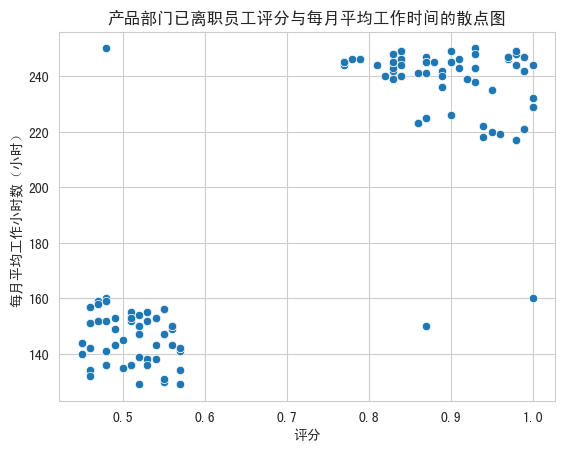

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 使用seaborn库绘图
# 设置中文字体,绘图风格
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
hr = pd.read_csv('../data/hr.csv',encoding='gbk')
print(hr)
product = hr.iloc[(hr['部门'].values=='产品开发部') &(hr['离职'].values==1),:]
ax = sns.scatterplot(x='评分',y='每月平均工作小时数（小时）',data=product)
plt.title('产品部门已离职员工评分与每月平均工作时间的散点图')
plt.show()

<AxesSubplot:xlabel='评分', ylabel='每月平均工作小时数（小时）'>

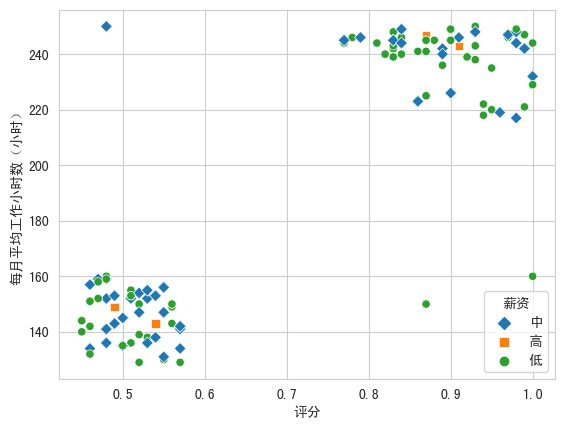

In [2]:
markers={'低':'o','中':'D','高':'s'}
sns.scatterplot(x='评分',y='每月平均工作小时数（小时）',
               hue='薪资',style='薪资',markers=markers,data=product)

         犯罪率  居住面积占比  商业用地占比  河流穿行  一氧化氮含量（ppm）  房间数（间）  住宅占比    平均距离  可达性指数  \
0    0.00632    18.0    2.31     0        0.538   6.575  65.2  4.0900      1   
1    0.02731     0.0    7.07     0        0.469   6.421  78.9  4.9671      2   
2    0.02729     0.0    7.07     0        0.469   7.185  61.1  4.9671      2   
3    0.03237     0.0    2.18     0        0.458   6.998  45.8  6.0622      3   
4    0.06905     0.0    2.18     0        0.458   7.147  54.2  6.0622      3   
..       ...     ...     ...   ...          ...     ...   ...     ...    ...   
501  0.06263     0.0   11.93     0        0.573   6.593  69.1  2.4786      1   
502  0.04527     0.0   11.93     0        0.573   6.120  76.7  2.2875      1   
503  0.06076     0.0   11.93     0        0.573   6.976  91.0  2.1675      1   
504  0.10959     0.0   11.93     0        0.573   6.794  89.3  2.3889      1   
505  0.04741     0.0   11.93     0        0.573   6.030  80.8  2.5050      1   

     财产税  学生与老师占比  低收入人群  房屋价格（千美元）  
0

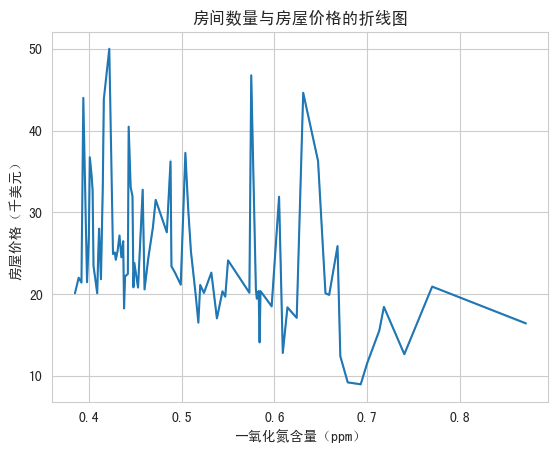

In [3]:
boston = pd.read_csv('../data/boston_house_prices.csv',encoding='gbk')
print(boston)
sns.lineplot(x='一氧化氮含量（ppm）',y='房屋价格（千美元）',data=boston,ci=0)
plt.title('房间数量与房屋价格的折线图')
plt.show()

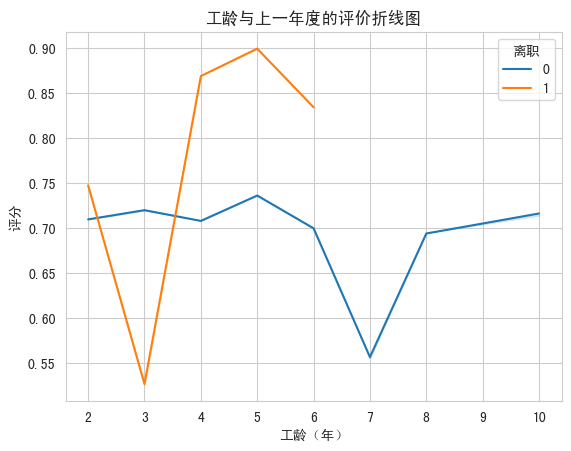

In [4]:
it=hr.iloc[hr['部门'].values=='IT部',:]
sns.lineplot(x='工龄（年）',y='评分',hue='离职',data=it,ci=0)
plt.title('工龄与上一年度的评价折线图')
plt.show()

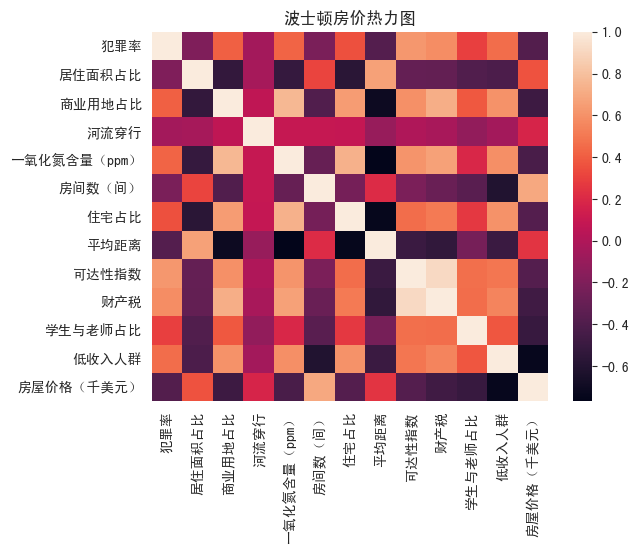

In [5]:
corr = boston.corr()
sns.heatmap(corr)
plt.title('波士顿房价热力图')
plt.show()

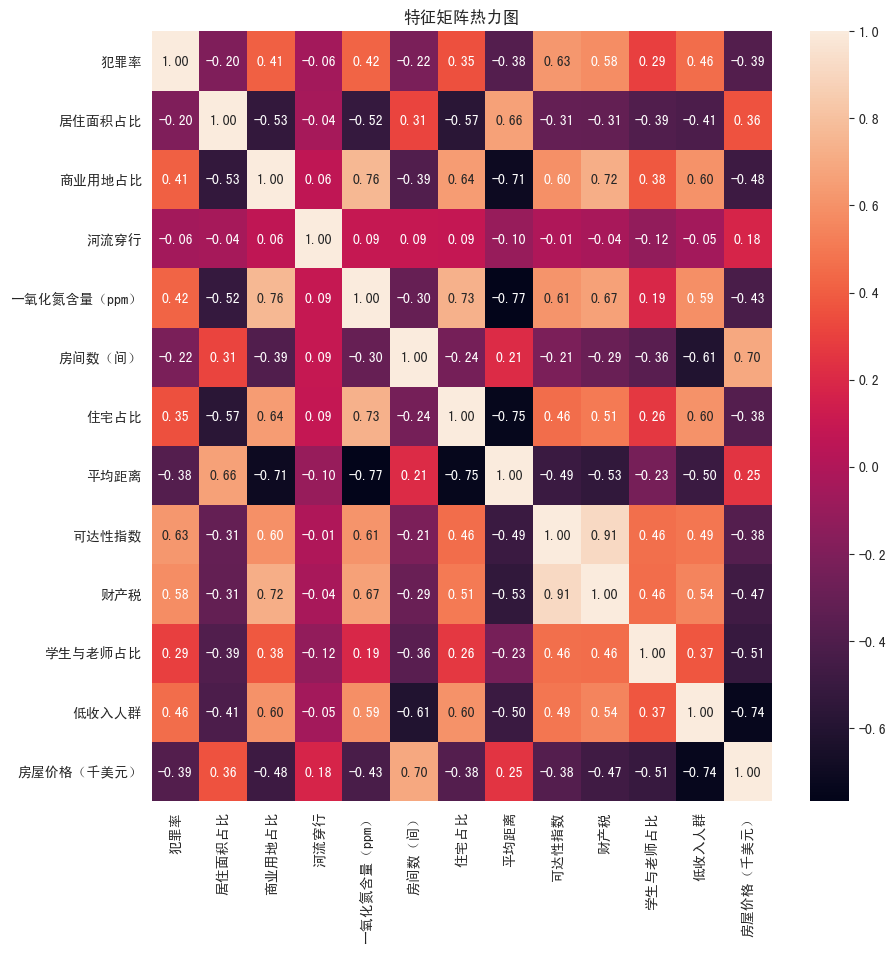

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.title('特征矩阵热力图')
plt.show()

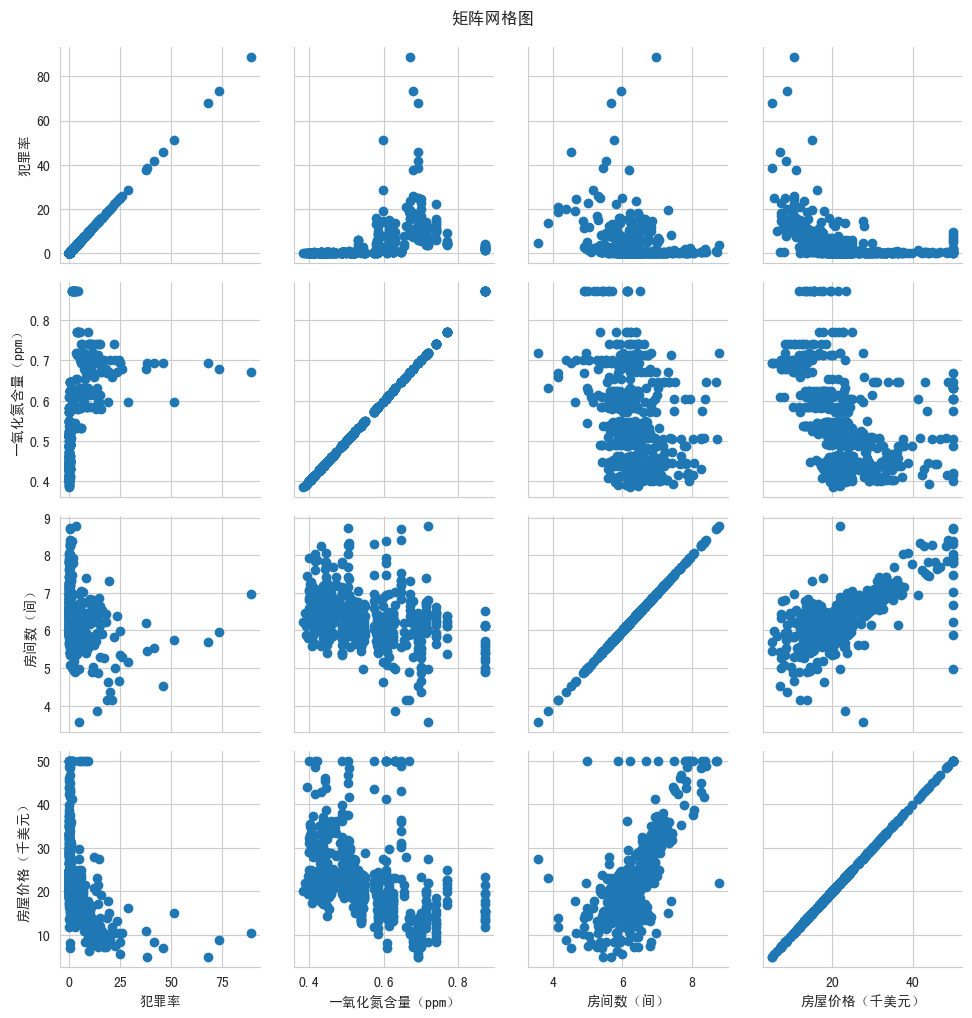

In [7]:
g = sns.PairGrid(boston,vars=['犯罪率','一氧化氮含量（ppm）','房间数（间）','房屋价格（千美元）'])
g = g.map(plt.scatter)
plt.suptitle('矩阵网格图',verticalalignment='bottom',y=1)
plt.show()

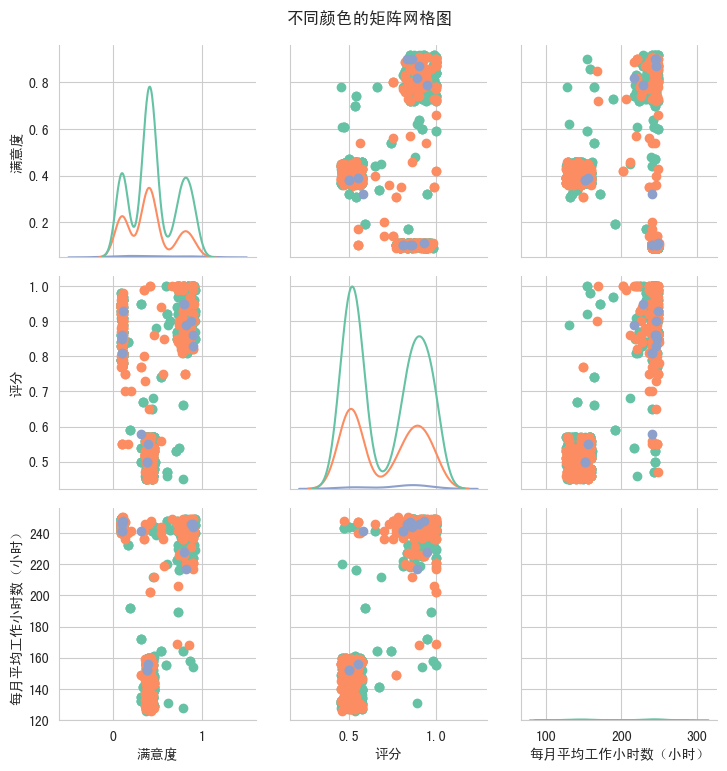

In [16]:
# 提取部门为销售,离职为1的数据
sell = hr.iloc[(hr['部门'].values=='销售部')&(hr['离职'].values==1),:]
g = sns.PairGrid(sell,
                vars=['满意度','评分','每月平均工作小时数（小时）'],
                hue='薪资',palette='Set2')
g = g.map_diag(sns.kdeplot)
g = g.map_offdiag(plt.scatter)
plt.suptitle('不同颜色的矩阵网格图',verticalalignment='bottom',y=1)
plt.show()

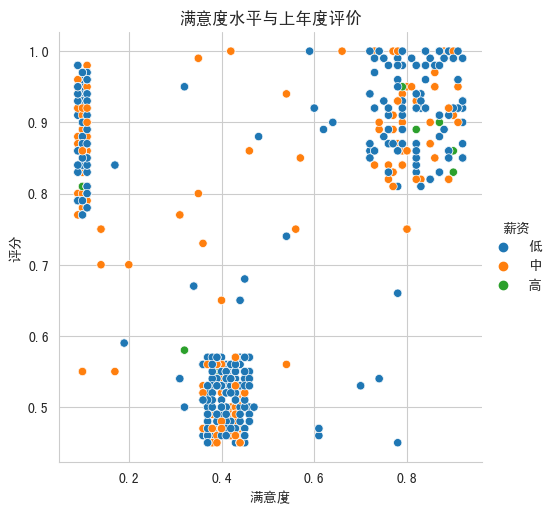

In [17]:
sns.relplot(x='满意度',y='评分',hue='薪资',data=sell)
plt.title('满意度水平与上年度评价')
plt.show()

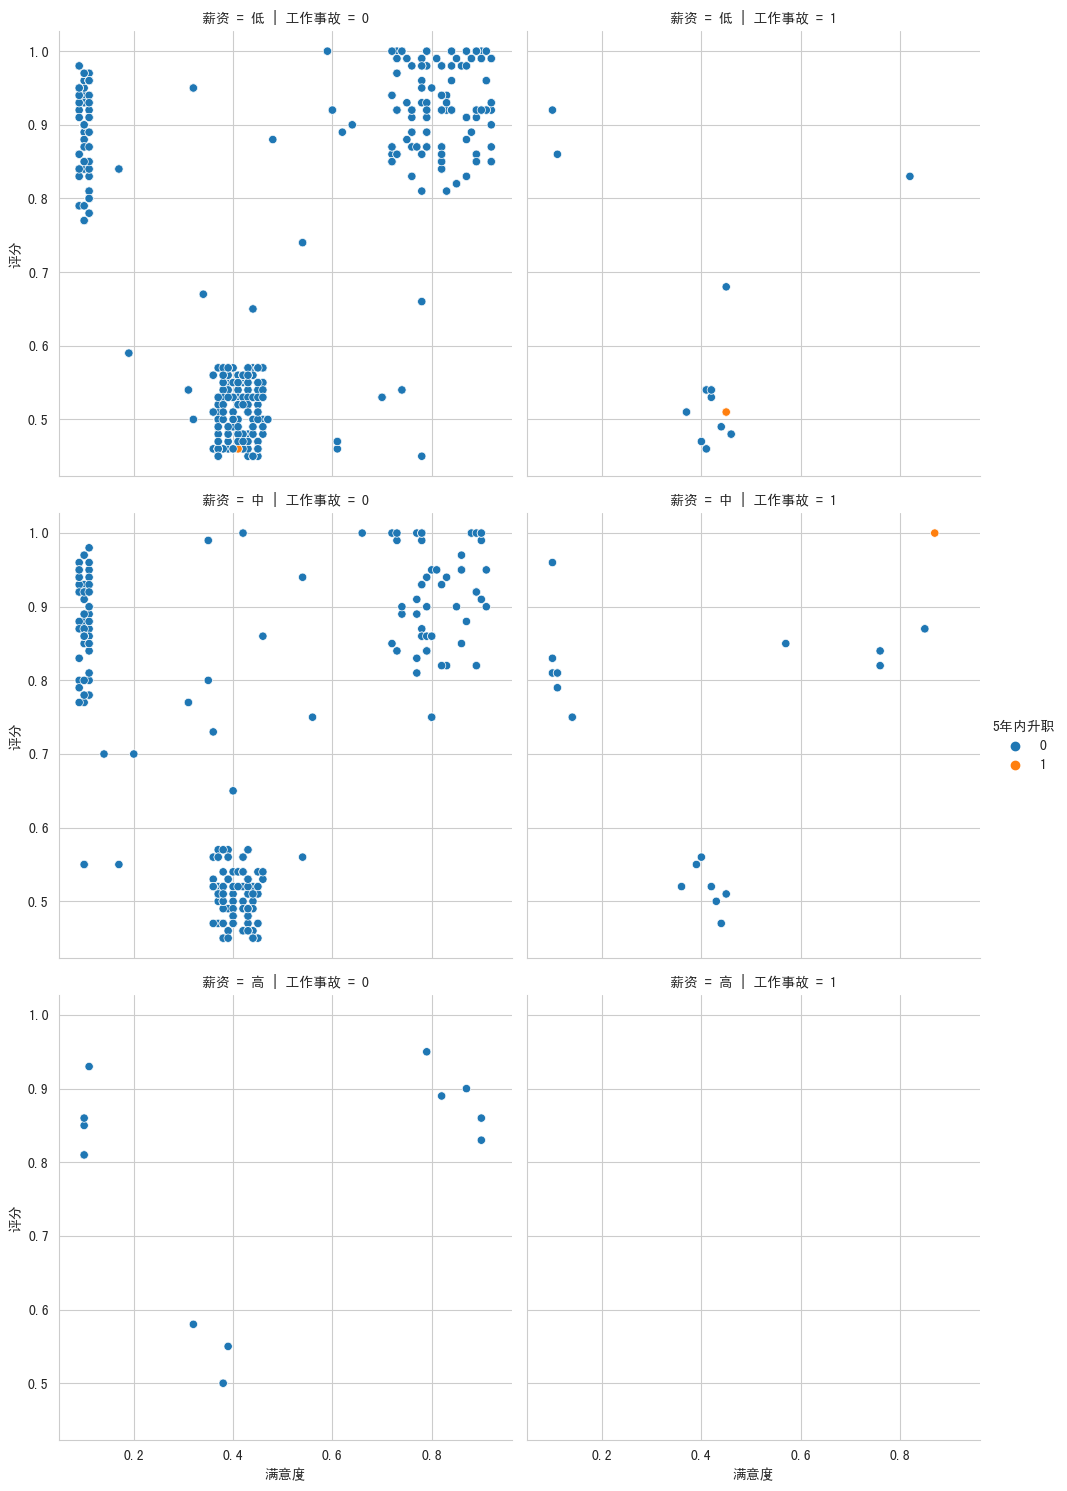

In [20]:
sns.relplot(x='满意度',y='评分',hue='5年内升职',row='薪资',
           col='工作事故',data=sell)
plt.show()

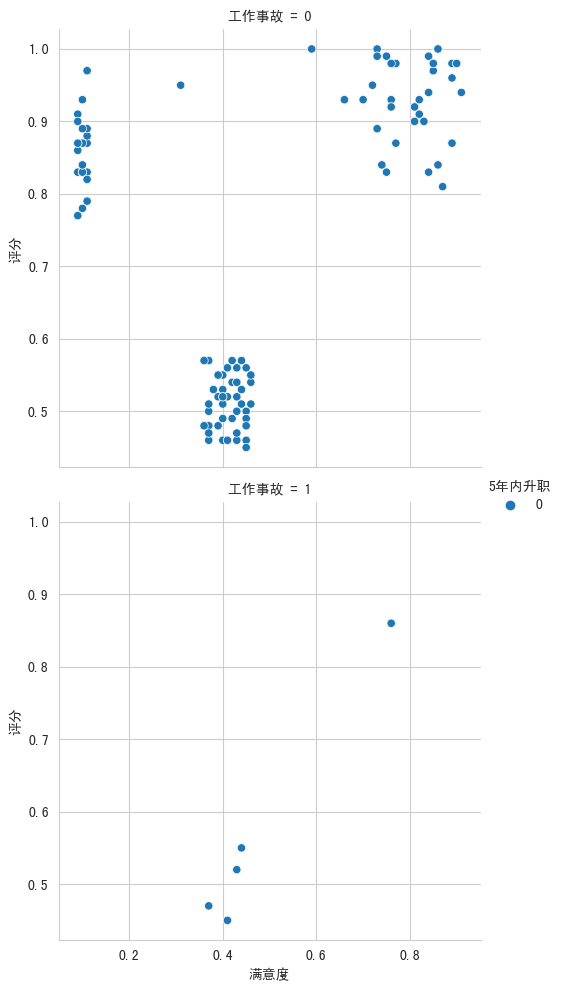

In [22]:
sns.relplot(x='满意度',y='评分',hue='5年内升职',col='工作事故',col_wrap=1,data=product)
plt.show()

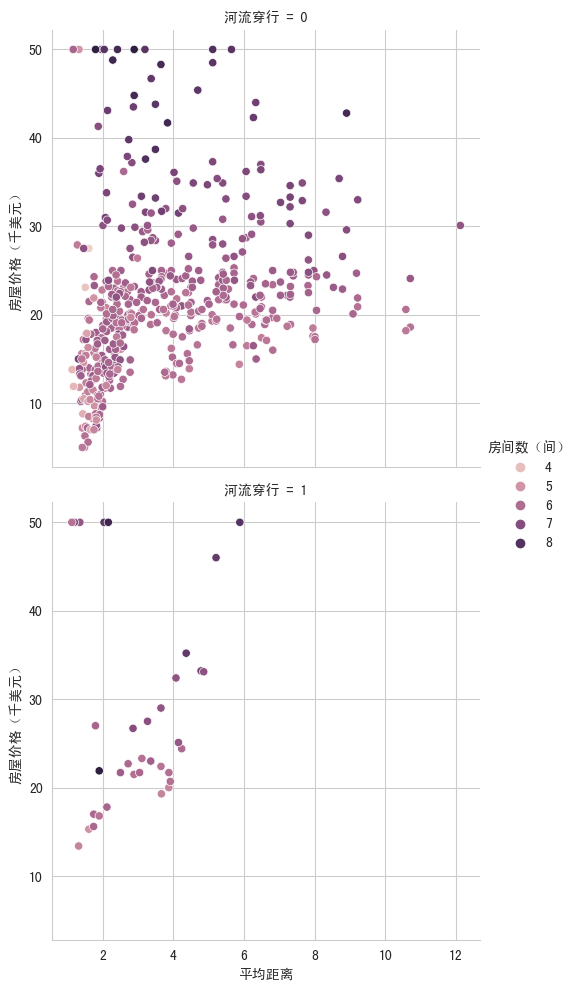

In [23]:
sns.relplot(x='平均距离',y='房屋价格（千美元）',hue='房间数（间）',col='河流穿行',col_wrap=1,data=boston)

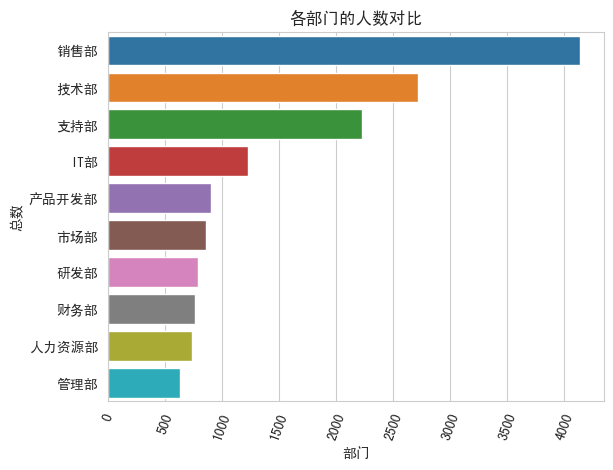

In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math

# 加载数据
boston = pd.read_csv('../data/boston_house_prices.csv',encoding='gbk')
hr = pd.read_csv('../data/hr.csv',encoding='gbk')

# 设置中文字体
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

count = hr['部门'].value_counts()
index = count.index
sns.barplot(x=count,y=index)
plt.xticks(rotation=70)
plt.xlabel('部门')
plt.ylabel('总数')
plt.title('各部门的人数对比')
plt.show()






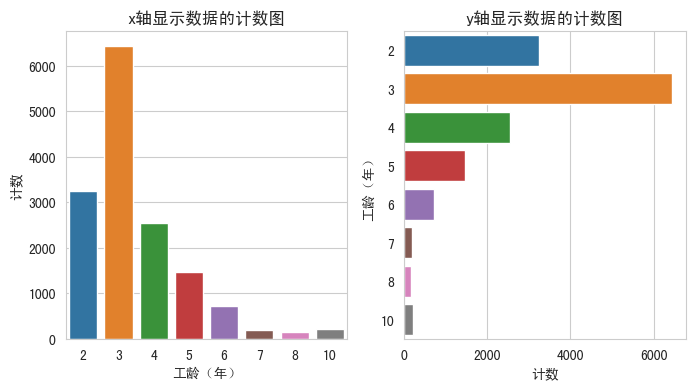

In [26]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(x='工龄（年）',data=hr)
plt.title('x轴显示数据的计数图')
plt.ylabel('计数')
plt.subplot(122)
sns.countplot(y='工龄（年）',data=hr)
plt.title('y轴显示数据的计数图')
plt.xlabel('计数')
plt.show()

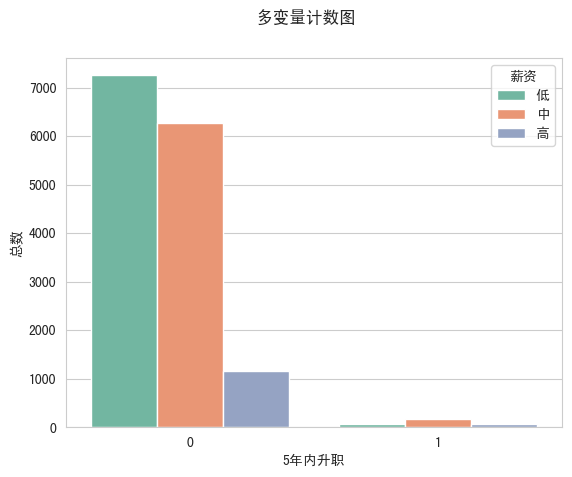

In [27]:
# 绘制多分类嵌套的计数图
sns.countplot(x='5年内升职',hue='薪资',data=hr,palette='Set2')
plt.suptitle('多变量计数图')
plt.ylabel('总数')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


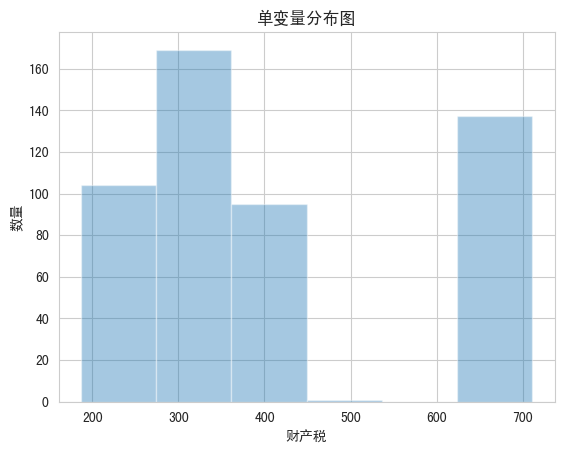

In [28]:
# 绘制单变量分布图
sns.distplot(boston['财产税'],kde=False)
plt.title('单变量分布图')
plt.ylabel('数量')
plt.show()

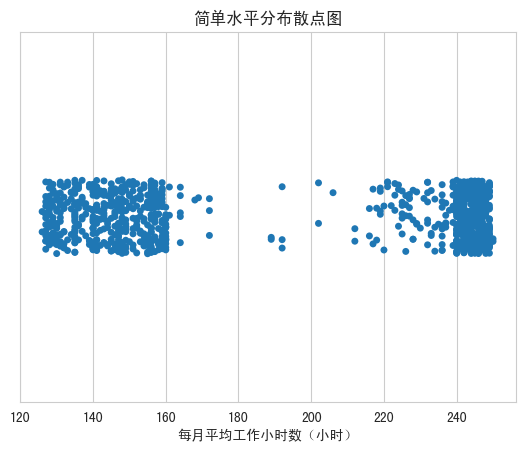

In [29]:
# 提取部门为销售部、离职为1的数据
sale = hr.iloc[(hr['部门'].values=='销售部')&(hr['离职'].values==1),:]
sns.stripplot(x=sale['每月平均工作小时数（小时）'])
plt.title('简单水平分布散点图')
plt.show()

In [ ]:
提取离职1的数据